In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt 
import numpy as np

## Dataset

N_feature * N_examples 

In [2]:
img_base_dir = "/home/hoseung/Work/data/BBS/g1/"
skel_base_dir = "/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/"

In [3]:
import BBS_pp_utils as bbpp

from BBS_pp_utils import json_to_arr

from glob import glob

class Loader():
    
    def __init__(self, cam="", ID=0, action=0, score=-1, dtypes=None):
        self.cam = cam
        self.ID = ID
        self.action = action
        self.score = score
        self.__skel_base = "/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/"
        self.__img_base = "/home/hoseung/Work/data/BBS/g1/"
        self.dtypes = dtypes
        
    @property
    def cam(self):
        return self.__cam
    
    @cam.setter
    def cam(self, v):
        if v is not None: self.__cam = v
        # update fn? 
        
    @property
    def ID(self):
        return self.__ID
    
    @ID.setter
    def ID(self, v):
        if v is not None: self.__ID = v
        
    @property
    def action(self):
        return self.__action
    
    @action.setter
    def action(self, v):
        if v is not None: self.__action = v
        
    @property
    def score(self):
        return self.__score
    
    @score.setter
    def score(self, v):
        if v is not None: self.__score = v
    
    def _update(self, cam=None, ID=None, action=None, score=None):
        self.cam = cam
        self.ID = ID
        self.action = action
        self.score = score
    
    def skel_fn(self, cam=None, ID=None, action=None, score=None):
        # Update if not None
        self._update(cam, ID, action, score)
        return self.__skel_base+f"{self.cam}/c{self.action}/{self.cam}_{self.ID:03d}_{self.action}_{self.score}.json"
    
    def img_fn_prefix(self, cam=None, ID=None, action=None, score=None):
        # Update if not None
        self._update(cam, ID, action, score)
        return self.__img_base+f'{self.cam}/{self.ID:03d}/BBS/RGB/{self.action}/{self.score}/'
    
    def get_jpg_list(self, cam=None, ID=None, action=None, score=None):
        # Update if not None
        self._update(cam, ID, action, score)
        fn_list = glob(self.img_fn_prefix()+"*.jpg")
        fn_list.sort()
        self.nframe = len(fn_list)
        return fn_list
    
    def load_skel(self, fn=None, parms=None):
        """If fn is given, others are ignored
        """
        if fn is None:
            fn = self.skel_fn(*parms)
        
        return json_to_arr(fn, self.dtypes)
    
    
    

## Fixed Loader

In [2]:
import os
from glob import glob 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import PIL

from BBS_pp_utils import json_to_arr
import BBS_pp_utils as bbpp

In [3]:
# Path
img_base_dir = "/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/RGB/"
skel_base_dir ="/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/Preds/"


class Loader():
    
    def __init__(self, action=0, score=1, ID=0, cam="a", img_base_dir=img_base_dir, skel_base_dir=skel_base_dir, dtypes=None):
        self.action = action
        self.score = score 
        self.ID = ID
        self.cam = cam 
        self.__skel_base = skel_base_dir
        self.__img_base = img_base_dir
        self.dtypes = dtypes
    
    
    @property
    def action(self):
        return self.__action
    
    @action.setter
    def action(self, v):
        if v is not None: self.__action = v
        
    @property
    def score(self):
        return self.__score
    
    @score.setter
    def score(self, v):
        if v is not None: self.__score = v
        
    @property
    def ID(self):
        return self.__ID
    
    @ID.setter
    def ID(self, v):
        if v is not None: self.__ID = v
                
    @property
    def cam(self):
        return self.__cam
    
    @cam.setter
    def cam(self, v):
        if v is not None: self.__cam = v
        # update fn? 
            
    def _update(self, action=None, score=None, ID=None, cam=None):
        self.action = action
        self.score = score
        self.ID = ID    
        self.cam = cam

    def skel_fn(self, action=None, score=None, ID=None, cam=None):
        # Update if not None
        self._update(action, score, ID, cam)
        return self.__skel_base+f"c{self.action}/{self.cam}_{self.ID:03d}_{self.action}_{self.score}.json"
    
    def img_fn_prefix(self, action=None, score=None, ID=None, cam=None):
        # Update if not None
        self._update(action, score, ID, cam)
        return self.__img_base+f'{self.action}/{self.score}/{self.ID:03d}/'
    
    def get_jpg_list(self, action=None, score=None, ID=None, cam=None):
        # Update if not None
        self._update(action, score, ID, cam)
        fn_list = glob(self.img_fn_prefix()+"*.jpg")
        fn_list.sort()
        return fn_list
    
    def get_id(self, action=None, score=None):
        # Update if not None
        self.action = action
        self.score = score
        id_list = os.listdir((self.__img_base+f'{self.action}/{self.score}'))
        id_list.sort()
        return id_list
    
    def load_skel(self, fn=None, parms=None):
        """If fn is given, others are ignored
        """
        if fn is None:
            fn = self.skel_fn(*parms)
        
        return json_to_arr(fn, self.dtypes)

In [4]:
arr = np.random.rand(10,10)

In [5]:
class Sampler():
    def __init__(self, iterable, clip_len=None, nskip=None):
        """
        """
        self.nframe_tot = len(iterable)
        
        self.uniform_interval=self.ind_uni_skip(nskip)
        self.npart = self.ind_npart(clip_len)
        
    def ind_npart(self, clip_len):
        nframe = self.nframe
        return np.linspace(0, nframe-1, clip_len).astype(int).tolist()
    
    

In [6]:
def get_img_frames(fn_list):
    
    
def load_img(fn_img):
    return plt.imread(fn_img)

def load_skel(fn_skel):
    

IndentationError: expected an indented block (1566653002.py, line 4)

## Fix jump

In [7]:
def fixed_parse(l):
    _, ID, action, score = l.split(".png")[0].split("_")
    _, x, y = l.split(".png")[1].split(" ")
    return int(action), int(score), int(ID), (int(x), int(y))

In [8]:
class Coord2name():
    
    def __init__(self):
        dtypes = bbpp.get_dtypes(ignored_joints=[])
        names = list(dtypes.names) + [" ", " "]
        self.names = np.array(names[1:]).reshape(6,6).T
        self.xbins = np.array([414, 838, 1262, 1696, 2120]) / 2
        self.ybins = np.array([392, 822, 1250, 1680, 2108]) / 2 
    
    def _coord_to_ind(self, coords):
        i = np.digitize(coords[0], self.xbins)
        j = np.digitize(coords[1], self.ybins)
        return [i,j]
    
    def coord2feature(self, coords):
        ind = self._coord_to_ind(coords)
        return self.names[ind[0], ind[1]]

In [9]:
def interpolate(prev, this):
    dx = this - prev
    return this + dx

In [10]:
def fill_missing(arr):
    tmp = arr.copy()
    for i, vv in enumerate(arr):
        if i < 2:
            continue
        
        if vv == 0:
            if arr[i-2] == 0:
                continue
                #tmp[i] = tmp[i-1]
            else:
                tmp[i] = np.mean(tmp[i-2:i])
                
    return tmp

In [25]:
def matrix_argmin(mat):
    return np.unravel_index(mat.argmin(), mat.shape)   

In [11]:
dtypes = bbpp.get_dtypes(ignored_joints=[])

ll = Loader(dtypes=dtypes)

In [12]:
# json 받아오기  
json = ll.skel_fn(5, 4, 9, 'a')    # class : 4    score : 4    frame index : 9    cam : 'a' 
print(json)

/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/Preds/c5/a_009_5_4.json


In [13]:
# skel fn 
fnl = np.array(ll.get_jpg_list())
sk = ll.load_skel(parms=[5, 3, 200, 'a'])

In [14]:
arr1, arr2 = sk

In [15]:
dtypes

dtype([('frame', '<i8'), ('xnose', '<f8'), ('ynose', '<f8'), ('xleft_eye', '<f8'), ('yleft_eye', '<f8'), ('xright_eye', '<f8'), ('yright_eye', '<f8'), ('xleft_ear', '<f8'), ('yleft_ear', '<f8'), ('xright_ear', '<f8'), ('yright_ear', '<f8'), ('xleft_shoulder', '<f8'), ('yleft_shoulder', '<f8'), ('xright_shoulder', '<f8'), ('yright_shoulder', '<f8'), ('xleft_elbow', '<f8'), ('yleft_elbow', '<f8'), ('xright_elbow', '<f8'), ('yright_elbow', '<f8'), ('xleft_wrist', '<f8'), ('yleft_wrist', '<f8'), ('xright_wrist', '<f8'), ('yright_wrist', '<f8'), ('xleft_hip', '<f8'), ('yleft_hip', '<f8'), ('xright_hip', '<f8'), ('yright_hip', '<f8'), ('xleft_knee', '<f8'), ('yleft_knee', '<f8'), ('xright_knee', '<f8'), ('yright_knee', '<f8'), ('xleft_ankle', '<f8'), ('yleft_ankle', '<f8'), ('xright_ankle', '<f8'), ('yright_ankle', '<f8')])

In [16]:
len(sk)

2

In [17]:
print(type(arr1))

<class 'numpy.ndarray'>


In [18]:
len(sk[0])

336

In [47]:
with open ('output_5.txt', 'r') as f:
    l = f.readlines()
# rstrip으로 \n 제거 
lr = l[349].rstrip()
lr   
meta_feature = fixed_parse(lr)
meta_feature

sc, co = meta_feature[:3], meta_feature[-1]
# sc : (4, 3, 14)
# co : (841, 370)
# 스켈레톤 추출 
sk = ll.load_skel(parms=list(sc)+['a'])
file_name = ll.skel_fn()


c2n = Coord2name()
co = np.array(co) 
feature = c2n.coord2feature(co)

print(file_name)
print('사람 수:', len(sk))
print('frame 수:', len(sk[0]))
print(feature)

/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/Preds/c5/a_368_5_1.json
사람 수: 3
frame 수: 607
xnose


In [44]:
#good_arrs 확인 
bbpp.quick_view(sk, fn=file_name.replace(".json", "original.png"))

In [45]:
print("0 값을 포함한 sk 길이", len(sk[0][feature]))
ind_list = np.where(~((sk[0][feature] == 0)*(sk[1][feature] == 0)))[0]
print("0 값을 뺀 sk 길이   ", len(ind_list))
good_arrs = [arr[ind_list] for arr in sk] 

for iframe in range(1, len(good_arrs[0])):#len(good_arrs[0])):
        # if i < 90:
        #     continue
        old = [arr[iframe-1][feature] for arr in good_arrs]
        new = [arr[iframe][feature] for arr in good_arrs]
        
        matrix = np.zeros((len(new), len(old)))
        for i, new_arr in enumerate(new):
            for j, old_arr in enumerate(old):
                matrix[i,j] = np.abs(new_arr - old_arr)
           
        inds=[]
        while(not np.all(matrix==np.inf)):
            #print(matrix)
            ind = matrix_argmin(matrix)
            #print(ind)
            inds.append(ind)
            matrix[ind[0],:] = np.inf
            matrix[:,ind[1]] = np.inf
        
        #print(inds)
        #print(good_arrs)

        tmps = [ar[iframe].copy() for ar in good_arrs]
        for ind in inds:
            good_arrs[ind[0]][iframe] = tmps[ind[1]]

0 값을 포함한 sk 길이 461
0 값을 뺀 sk 길이    461


In [46]:
#good_arrs 확인 
bbpp.quick_view(good_arrs, fn=file_name.replace(".json", "fixed.png"))

In [29]:
with open ('output_5.txt', 'r') as f:
    l = f.readlines()
# rstrip으로 \n 제거 
lr = l[368].rstrip()
lr   
meta_feature = fixed_parse(lr)
meta_feature

sc, co = meta_feature[:3], meta_feature[-1]
# sc : (4, 3, 14)
# co : (841, 370)
# 스켈레톤 추출 
sk = ll.load_skel(parms=list(sc)+['a'])

# 사람이 몇명인지 확인
print(len(sk))

c2n = Coord2name()
co = np.array(co) 
feature = c2n.coord2feature(co)
feature

2


'yright_eye'

In [48]:
def feature_preprocessing(sk, feature):
    ind_list = np.where(~((sk[0][feature] == 0)*(sk[1][feature] == 0)))[0]
    good_arrs = [arr[ind_list] for arr in sk] 

    for iframe in range(1, len(good_arrs[0])):#len(good_arrs[0])):
            # if i < 90:
            #     continue
            old = [arr[iframe-1][feature] for arr in good_arrs]
            new = [arr[iframe][feature] for arr in good_arrs]

            matrix = np.zeros((len(new), len(old)))
            for i, new_arr in enumerate(new):
                for j, old_arr in enumerate(old):
                    matrix[i,j] = np.abs(new_arr - old_arr)

            inds=[]
            while(not np.all(matrix==np.inf)):
                #print(matrix)
                ind = matrix_argmin(matrix)
                #print(ind)
                inds.append(ind)
                matrix[ind[0],:] = np.inf
                matrix[:,ind[1]] = np.inf

            #print(inds)
            #print(good_arrs)

            tmps = [ar[iframe].copy() for ar in good_arrs]
            for ind in inds:
                good_arrs[ind[0]][iframe] = tmps[ind[1]]
    return good_arrs

In [356]:
#good_arrs 확인 
bbpp.quick_view(feature_preprocessing(good_arrs, feature), fn=file_name.replace(".json", "fixed_function.png"))

0 값을 포함한 sk 길이 650
0 값을 뺀 sk 길이    650


In [62]:
def matrix_argmin(mat):
    return np.unravel_index(mat.argmin(), mat.shape)     

In [111]:
sk = ll.load_skel(parms=[4, 3, 125, 'a'])
print("0 값을 포함한 sk 길이", len(sk[0][feature]))
ind_list = np.where(~((sk[0][feature] == 0)*(sk[1][feature] == 0)))[0]
print("0 값을 뺀 sk 길이   ", len(ind_list))
good_arrs = [arr[ind_list] for arr in sk] 

for iframe in range(1, len(good_arrs[0])):#len(good_arrs[0])):
        # if i < 90:
        #     continue
        old = [arr[iframe-1][feature] for arr in good_arrs]
        new = [arr[iframe][feature] for arr in good_arrs]
        
        matrix = np.zeros((len(new), len(old)))
        for i, new_arr in enumerate(new):
            for j, old_arr in enumerate(old):
                matrix[i,j] = np.abs(new_arr - old_arr)
           
        inds=[]
        while(not np.all(matrix==np.inf)):
            #print(matrix)
            ind = matrix_argmin(matrix)
            #print(ind)
            inds.append(ind)
            matrix[ind[0],:] = np.inf
            matrix[:,ind[1]] = np.inf
        
        #print(inds)
        #print(good_arrs)

        tmps = [ar[iframe].copy() for ar in good_arrs]
        for ind in inds:
            good_arrs[ind[0]][iframe] = tmps[ind[1]]

0 값을 포함한 sk 길이 163
0 값을 뺀 sk 길이    163


In [108]:
file_name = ll.skel_fn()
file_name

'/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/Preds/c4/a_125_4_3.json'

# 이 상태로 얼추 identity 맞춰짐 (12월 8일 저녁 8시 40분)

In [30]:
nn = len(sk)

for i in range(1,len(sk[0])):
    old = [arr[i-1][feature] for arr in sk]
    new = [arr[i][feature] for arr in sk]
    print(f"at {i-1}", old)
    print(f"at {i}", new)
    
    pairs = []
    min_diffs =[]
    for j, nn in enumerate(new):
        diffs=[]
        for oo in (old):
            diffs.append(np.abs(nn-oo))
            #print(nn, oo)
        
        print(f"better match for {j}", np.argmin(diffs))

        imin = np.argmin(diffs)
        pairs.append([j, imin])
        min_diffs.append(diffs[imin])

    
    tmps = [ar[i].copy() for ar in sk]
    for pa in pairs:
        i_old, i_new = pa
        print(i_old, i_new)
        print("org :", sk[i_new][i][feature])
        sk[i_new][i] = tmps[i_old]
        print("updated:", sk[i_new][i][feature])
        
    print("------------------")

at 0 [440.28, 0.0]
at 1 [446.64, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 446.64
updated: 446.64
1 1
org : 0.0
updated: 0.0
------------------
at 1 [446.64, 0.0]
at 2 [449.79, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 449.79
updated: 449.79
1 1
org : 0.0
updated: 0.0
------------------
at 2 [449.79, 0.0]
at 3 [453.7, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 453.7
updated: 453.7
1 1
org : 0.0
updated: 0.0
------------------
at 3 [453.7, 0.0]
at 4 [453.23, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 453.23
updated: 453.23
1 1
org : 0.0
updated: 0.0
------------------
at 4 [453.23, 0.0]
at 5 [450.99, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 450.99
updated: 450.99
1 1
org : 0.0
updated: 0.0
------------------
at 5 [450.99, 0.0]
at 6 [448.13, 0.0]
better match for 0 0
better match for 1 1
0 0
org : 448.13
updated: 448.13
1 1
org : 0.0
updated: 0.0
------------------
at 6 [448.13, 0.0]
at 7 [447.17, 0.0]
better match

### 퀵뷰로 identity 고정용 feature 그리기 - 완료

In [31]:
if False:
    ll = Loader(dtypes=dtypes)
    #feature = 'yright_wrist'
    all_preds = glob("/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/*/*.json")
    for i, fnj in enumerate(all_preds):
        if i <= 881:
            continue
        #sk0 = ll.load_skel(parms=["a", 29, 1, 1])
        try:
            sks = json_to_arr(fnj, dtypes)
            bbpp.quick_view(sks, fn=fnj.replace("json", "png"))
        except:
            print("failed", i)
    print(i)

## 어느 feature를 기준으로 identity fix할지 "눈으로 보고" 결정

In [32]:
to_fix = glob("/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4_plot/overlap/*.png")
to_fix.sort()
#for i, fnj in enumerate(all_preds):

## Original parse

In [33]:
def parse(l):
    _, ID, action, score = l.split(".png")[0].split("_")
    _, x, y = l.split(".png")[1].split(" ")
    return int(ID), int(action), int(score), (int(x), int(y))

## Fixed parse 
데이터 로더를 바꾸면서 파서도 바꿈

In [34]:
def fixed_parse(l):
    _, ID, action, score = l.split(".png")[0].split("_")
    _, x, y = l.split(".png")[1].split(" ")
    return int(action), int(score), int(ID), (int(x), int(y))

## 선정된 feature를 활용해서 identity fix

In [35]:
class Coord2name():
    
    def __init__(self):
        dtypes = bbpp.get_dtypes(ignored_joints=[])
        names = list(dtypes.names) + [" ", " "]
        self.names = np.array(names[1:]).reshape(6,6)
        self.xbins = np.array([0,414, 838, 1262, 1696, 2120]) / 2
        self.ybins = np.array([0,392, 822, 1250, 1680, 2108]) / 2 
    
    def _coord_to_ind(self, coords):
        i = np.digitize(coords[0], self.xbins)
        j = np.digitize(coords[1], self.ybins)
        return [i,j]
    
    def coord2feature(self, coords):
        ind = self._coord_to_ind(coords)
        return self.names[ind[0], ind[1]]

In [36]:
def interpolate(prev, this):
    dx = this - prev
    return this + dx

In [37]:
def fill_missing(arr):
    tmp = arr.copy()
    for i, vv in enumerate(arr):
        if i < 2:
            continue
        
        if vv == 0:
            if arr[i-2] == 0:
                continue
                #tmp[i] = tmp[i-1]
            else:
                tmp[i] = np.mean(tmp[i-2:i])
                
    return tmp

In [38]:
with open ('c4_fix_feature.txt', 'r') as f:
    l = f.readlines()
    

In [39]:
# rstrip으로 \n 제거 
lr = l[66].rstrip()
lr

'a_125_4_3.png 144 547'

In [40]:
meta_feature = fixed_parse(lr)
meta_feature

(4, 3, 125, (144, 547))

In [41]:
sc, co = meta_feature[:3], meta_feature[-1]
# sc : (4, 3, 14)
# co : (841, 370)
# 스켈레톤 추출 
sk = ll.load_skel(parms=list(sc)+['a'])

# 사람이 몇명인지 확인
print(len(sk))

2


In [42]:
co

(144, 547)

parse의 좌표값으로 스켈레톤에서 피쳐를 뽑아야함 

In [43]:
c2n = Coord2name()
co = np.array(co) 
feature = c2n.coord2feature(co)
feature

'yright_ear'

In [44]:
varr1 = fill_missing(sk[0][feature])
varr2 = fill_missing(sk[0][feature])

## feature를 swap 하기 전에 확인

In [45]:
file_name = ll.skel_fn()
file_name

'/home/eckim/workspace/fhe_etri/Data/BBS/Sample_BBS/BBS/Preds/c4/a_125_4_3.json'

In [46]:
# 모듈 수정 업데이트 
import importlib
importlib.reload(bbpp)

<module 'BBS_pp_utils' from '/home/eckim/workspace/fhe_etri/RF/fhenrf/pose/BBS_pp_utils.py'>

In [47]:
# 확인 완료 
bbpp.quick_view(sk, fn=file_name.replace(".json", "fixed.png"))

## feature Fix 

In [48]:
arrs = [fill_missing(ss[feature]) for ss in sk]

# fix가 잘 작동하지 않아.. (12.9. 9시)

In [217]:
def fix(sk, feature):
    arrs = [fill_missing(ss[feature]) for ss in sk]
    
    for i in range(1,len(sk[0])):
        old = [arr[i-1][feature] for arr in arrs]
        new = [arr[i][feature] for arr in arrs]
        print(f"at {i-1}", old)
        print(f"at {i}", new)
        
        # interpolate missing vales
        if i > 0:
            oold = [arr[i-2][feature] for arr in arrs]
            for i,(n,o, oo) in enumerate(zip(new, old, oold)):
                if n == 0:
                    new[i] = interpolate(o, oo)
                    print("inmterpolate", new)
        pairs = []
        min_diffs =[]
        for j, nn in enumerate(new):
            diffs=[]
            for oo in (old):
                diffs.append(np.abs(nn-oo))
                #print(nn, oo)

            #print(f"better match for {j}", np.argmin(diffs))
            imin = np.argmin(diffs)
            pairs.append([j, imin])
            min_diffs.append(diffs[imin])

        tmps = [ar[i].copy() for ar in sk]
        for pa in pairs:
            i_old, i_new = pa
            #print(i_old, i_new)
            print("org :", sk[i_new][i][feature])
            sk[i_new][i] = tmps[i_old]
            print("updated:", sk[i_new][i][feature])

    print("------------------")
    
    

In [216]:
file_name = ll.skel_fn()
bbpp.quick_view(sk, fn=file_name.replace(".json", "fixed.png"))

142에서 둘 다 0이어서 끊어짐. -> 두 점으로 interpolate

## 최종 확인 

/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4/a_014_4_3.json xright_shoulder
------------------
/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4/a_015_4_3.json xright_shoulder
------------------
/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4/a_019_4_1.json xright_ear
------------------
/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4/a_020_4_0.json xright_ear
------------------


KeyboardInterrupt: 

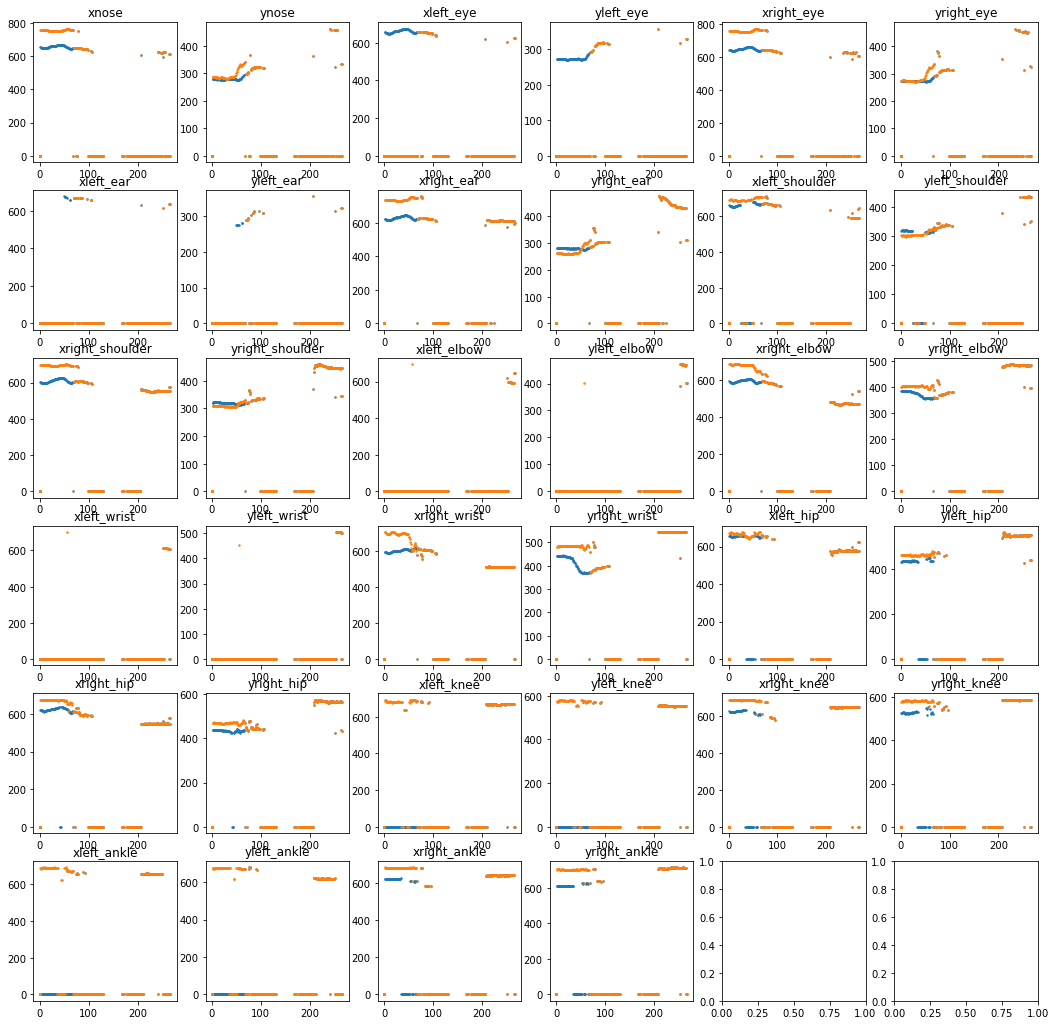

In [150]:
# original code
# 피쳐 뽑아내기 
c2n = Coord2name()

ll = Loader(dtypes=dtypes)

for sc, co in zip(scenes, coords):
    sk = ll.load_skel(parms=["a"] + list(*sc))
    #nn = len(sk)
    co = np.array(co) -1.5
    co[0] *= 2600 / 6
    co[1] *= 2600 / 6
    feature = c2n.coord2feature(co)
    print(ll.skel_fn(), feature)
    
## 최종 결과 확인
    fix(sk, feature)
    file_name = ll.skel_fn()
    bbpp.quick_view(sk, fn=file_name.replace(".json", "fixed.png"))

In [149]:
file_name

'/home/hoseung/Dropbox/DeepInsight/2021ETRI/BBS_data/Preds/a/c4/a_041_4_0.json'

In [145]:
sc

[(68, 4, 1)]